## E-commerce Text Classification
#### This is the classification based E-commerce text dataset for 4 categories - "Electronics", "Household","Books" and "Clothing & Accessories", which almost cover 80% of any E-commerce website.
### Steps in Project
 ##### Basic understanding of text pre-processing.
  ##### Bag of words
 #####  Tf-idf
  ##### Build the classification model.
  ##### Evaluate the Model.

In [4]:
# install and import necessary libraries.

import re, string, unicodedata                          # Import Regex, string and unicodedata.
                                   # Import contractions library.
from bs4 import BeautifulSoup                           # Import BeautifulSoup.

import numpy as np                                      # Import numpy.
import pandas as pd                                     # Import pandas.
import nltk                                             # Import Natural Language Tool-Kit.

nltk.download('stopwords')                              # Download Stopwords.
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.
import matplotlib.pyplot as plt                         
import seaborn as sns

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\p00137247\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\p00137247\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\p00137247\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [5]:
# Loading data into pandas dataframe
data = pd.read_csv("ecommerceDataset (1).csv")

In [6]:
data.shape   

(50424, 2)

In [7]:
data.head()  

,Label,Text
0,Household,Styleys Wrought Iron Coat Rack Hanger Creative...
1,Household,Cuisinart CCO-50BKN Deluxe Electric Can Opener...
2,Household,Anchor Penta 6 Amp 1 -Way Switch (White) - Pac...
3,Clothing & Accessories,"Proline Men's Track Jacket Proline Woven, 100%..."
4,Household,Chef's Garage 2 Slot Edge Grip Kitchen Knife S...


In [8]:
data.dtypes

Label    object
Text     object
dtype: object

In [9]:
data.isnull().sum(axis=0) 

Label    0
Text     1
dtype: int64

In [10]:
data = data.dropna(subset=['Text']) # drop all the rows that have price as null as this is my dependent variable. 

In [11]:
data.isnull().sum(axis=0) 

Label    0
Text     0
dtype: int64

In [12]:
 # function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [13]:
data.groupby(by=['Label']).count()

,Text
Label,
Books,11820
Clothing & Accessories,8670
Electronics,10621
Household,19312


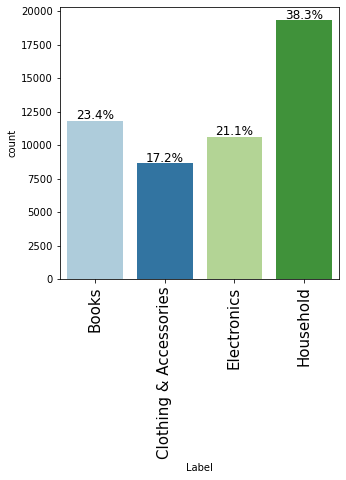

In [14]:
labeled_barplot(data, "Label", perc=True)

#### Household Label category accounts for the highest text, roughly about 38.3 %
#### Books , Clothing & Accessories and Electronics have similar percentage of text counts

In [15]:
#Describe helps us to get brief summary of each variable
data.describe()

,Label,Text
count,50423,50423
unique,4,27801
top,Household,Think & Grow Rich About the Author NAPOLEON HI...
freq,19312,30


### Wordcloud for Labels: Books

In [16]:
airline_tweets=data[data['Label']=='Books']
words = ' '.join(data['Text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

In [17]:
pip install wordcloud

In [18]:
from wordcloud import WordCloud,STOPWORDS

In [19]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

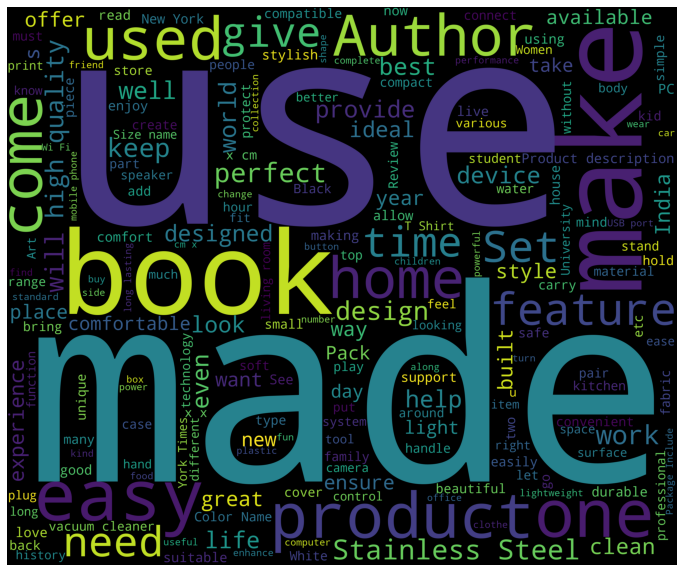

In [20]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### Text with book label are frequently involved few words like book, Author, design, Product.

### Wordcloud for Labels: Clothing & Accessories

In [39]:
airline_tweets=data[data['Label']=='Clothing & Accessories']
words = ' '.join(data['Text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

In [40]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

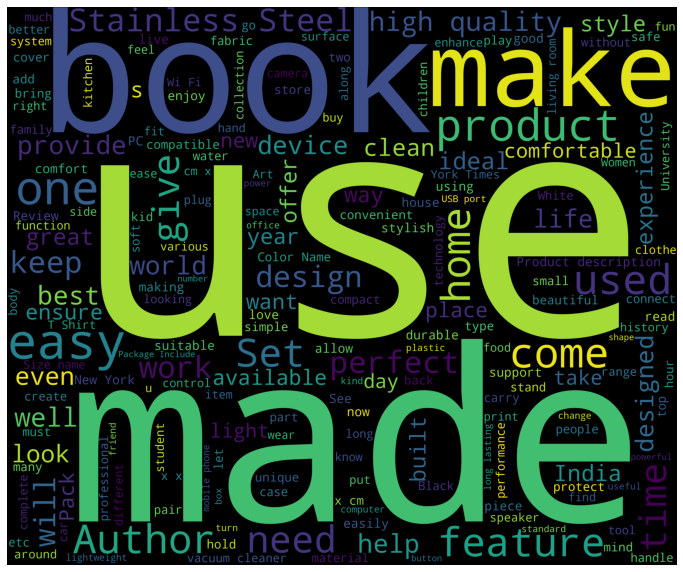

In [41]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


#### Text with Clothing & Accessories label are frequently involved few words like clean, Product, style and look

### Wordcloud for Labels: Electronics

In [42]:
airline_tweets=data[data['Label']=='Electronics']
words = ' '.join(data['Text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

In [43]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

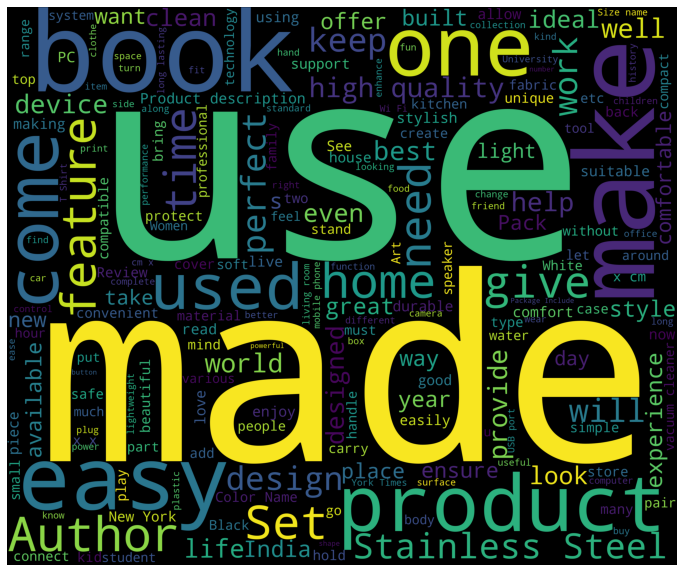

In [44]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### Text with electronics label are frequently involved few words like Device, stylish, India, available.

### Wordcloud for Labels: Household

In [48]:
airline_tweets=data[data['Label']=='Household']
words = ' '.join(data['Text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

In [49]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

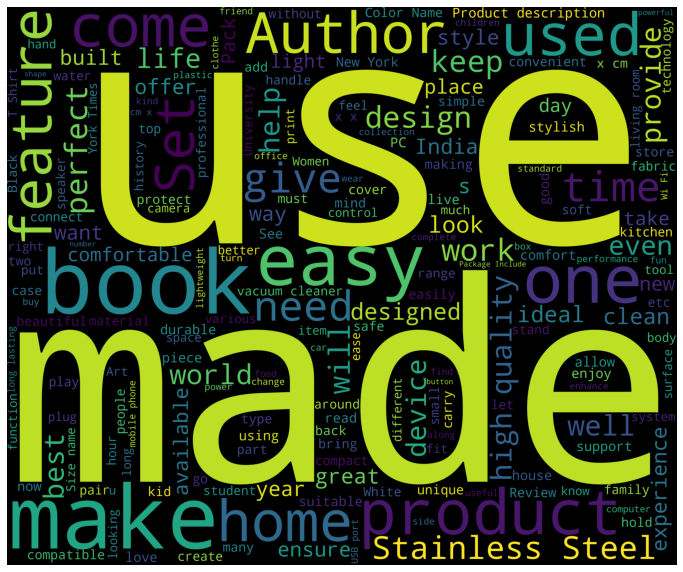

In [50]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### Text with household label are frequently involved few words like home, Stainless Steel, high quality and great

## Data Pre Processing Data Prepration

##### Remove html tags.
###### Replace contractions in string. (e.g. replace I'm --> I am) and so on.\
###### Remove numbers.
###### Tokenization
###### To remove Stopwords.
###### Lemmatized data
###### We have used NLTK library to tokenize words , remove stopwords and lemmatize the remaining words.

In [21]:
def strip_html(Text):
    soup = BeautifulSoup(Text, "html.parser")
    return soup.get_text()

data['Text'] = data['Text'].apply(lambda x: strip_html(x))
data.head()

,Label,Text
0,Household,Styleys Wrought Iron Coat Rack Hanger Creative...
1,Household,Cuisinart CCO-50BKN Deluxe Electric Can Opener...
2,Household,Anchor Penta 6 Amp 1 -Way Switch (White) - Pac...
3,Clothing & Accessories,"Proline Men's Track Jacket Proline Woven, 100%..."
4,Household,Chef's Garage 2 Slot Edge Grip Kitchen Knife S...


In [22]:
!pip install contractions

In [23]:
import contractions

In [24]:
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

data['Text'] = data['Text'].apply(lambda x: replace_contractions(x))
data.head()

,Label,Text
0,Household,Styleys Wrought Iron Coat Rack Hanger Creative...
1,Household,Cuisinart CCO-50BKN Deluxe Electric Can Opener...
2,Household,Anchor Penta 6 Amp 1 -Way Switch (White) - Pac...
3,Clothing & Accessories,"Proline Men's Track Jacket Proline Woven, 100%..."
4,Household,Chef's Garage 2 Slot Edge Grip Kitchen Knife S...


In [25]:
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

data['Text'] = data['Text'].apply(lambda x: remove_numbers(x))
data.head()

,Label,Text
0,Household,Styleys Wrought Iron Coat Rack Hanger Creative...
1,Household,"Cuisinart CCO-BKN Deluxe Electric Can Opener, ..."
2,Household,Anchor Penta Amp -Way Switch (White) - Pack ...
3,Clothing & Accessories,"Proline Men's Track Jacket Proline Woven, % Po..."
4,Household,Chef's Garage Slot Edge Grip Kitchen Knife Sh...


In [26]:
data['Text'] = data.apply(lambda row: nltk.word_tokenize(row['Text']), axis=1) # Tokenization of data

In [27]:
data.head()   

,Label,Text
0,Household,"[Styleys, Wrought, Iron, Coat, Rack, Hanger, C..."
1,Household,"[Cuisinart, CCO-BKN, Deluxe, Electric, Can, Op..."
2,Household,"[Anchor, Penta, Amp, -Way, Switch, (, White, )..."
3,Clothing & Accessories,"[Proline, Men, 's, Track, Jacket, Proline, Wov..."
4,Household,"[Chef, 's, Garage, Slot, Edge, Grip, Kitchen, ..."


In [28]:
stopwords = stopwords.words('english')

customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

# Set custom stop-word's list as not, couldn't etc. words matter in Sentiment, so not removing them from original data.

stopwords = list(set(stopwords) - set(customlist)) 

In [29]:
lemmatizer = WordNetLemmatizer()

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words
def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words
def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

data['Text'] = data.apply(lambda row: normalize(row['Text']), axis=1)
data.head()

,Label,Text
0,Household,styleys work iron coat rack hanger creative fa...
1,Household,cuisinart ccobkn deluxe electric opener black ...
2,Household,anchor penta amp way switch white pack anchor ...
3,Clothing & Accessories,proline men track jacket proline weave polyest...
4,Household,chef garage slot edge grip kitchen knife sharp...


## Building the model based on countvectorizer and Random forest

In [30]:
# Vectorization (Convert text data to numbers).
from sklearn.feature_extraction.text import CountVectorizer

Count_vec = CountVectorizer(max_features=5000)                # Keep only 5000 features as number of features will increase the processing time.
data_features = Count_vec.fit_transform(data['Text'])

data_features = data_features.toarray()                        # Convert the data features to array.

In [31]:
data_features.shape

(50423, 5000)

In [32]:
X = data_features

y = data.Label

In [33]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [34]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, X, y, cv=10)))

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.9710847245226161


In [35]:
# Finding optimal number of base learners using k-fold CV ->
base_ln = [x for x in range(1, 25)]
base_ln

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24]

#### Optimize the parameter:The number of trees in the random forest model(n_estimators)

In [36]:
# K-Fold Cross - validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

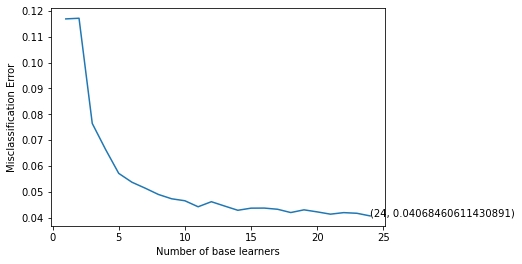

In [37]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                 #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                           #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [38]:
# Training the best model and calculating accuracy on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.967144840351689

In [39]:
# Predict the result for test data using the model built above.

result = forest.predict(X_test)

[[3468   13   18   91]
 [  23 2515   10   48]
 [  26    9 3000  132]
 [  55   60   77 5582]]


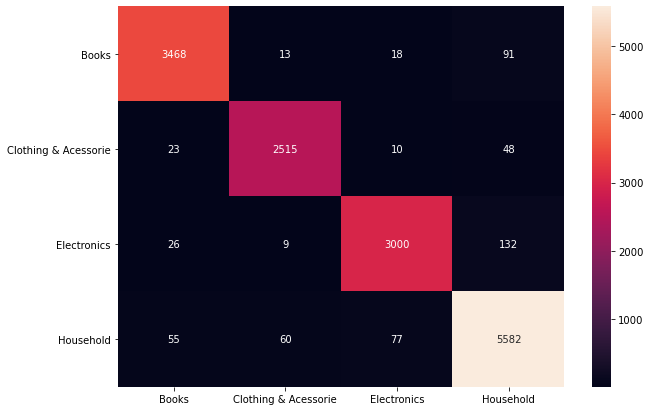

In [41]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in ['Books', 'Clothing & Acessorie', 'Electronics','Household']],
                  columns = [i for i in ['Books', 'Clothing & Acessorie', 'Electronics','Household']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

#### Wordcloud of top 20 important features from countvectorizer+Randomforest based mode

author,women,book,men,wear,home,cotton,gb,usb,camera,girls,review,black,university,kitchen,stainless,color,steel,fit,use,phone,laptop,fabric,set,plastic,casual,easy,cable,port,boys,white,make,battery,room,audio,video,design,wireless,inch,compatible,
 
 


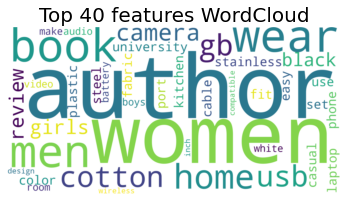

In [42]:
all_features = Count_vec.get_feature_names()              #Instantiate the feature from the vectorizer
top_features=''                                            # Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=','
    
print(top_features)  

print(" ") 
print(" ")     

from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",colormap='viridis',width=2000, 
                          height=1000).generate(top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()

In [44]:
# Using TfidfVectorizer to convert text data to numbers.

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(max_features=5000)
data_features = tfidf_vect.fit_transform(data['Text'])

data_features = data_features.toarray()

data_features.shape

(50423, 5000)

In [47]:
X = data_features

y = data.Label

In [48]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

import numpy as np

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, X, y, cv=10)))

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.9707673232729268


In [49]:
# Finding optimal number of base learners using k-fold CV ->
base_ln = [x for x in range(1, 25)]
base_ln

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24]

In [50]:
# K-Fold Cross - validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

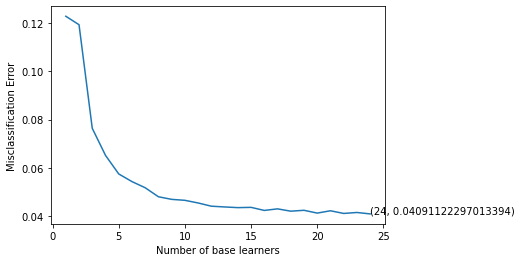

In [51]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                 #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                           #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [52]:
# Training the best model and calculating accuracy on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9677398030012561

In [53]:
result = forest.predict(X_test)

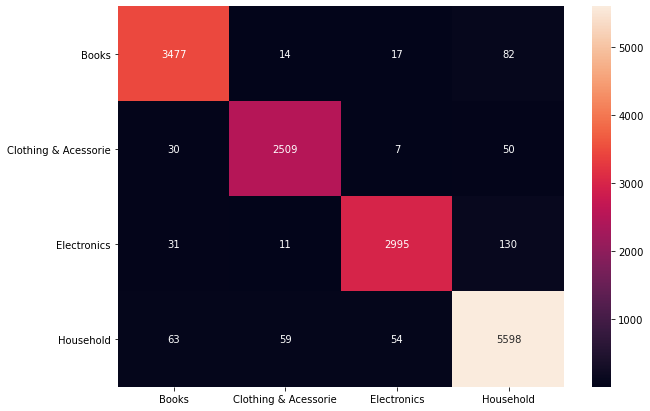

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

df_cm = pd.DataFrame(conf_mat, index = [i for i in ['Books', 'Clothing & Acessorie', 'Electronics','Household']],
                  columns = [i for i in ['Books', 'Clothing & Acessorie', 'Electronics','Household']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

women, wear, author, book, cotton, home, men, review, steel, camera, boys, kitchen, use, cable, gb, girls, fit, black, plastic, usb, write, audio, port, size, casual, university, laptop, clean, wireless, room, color, make, card, fabric, science, phone, watt, set, easy, mm, 
 
 


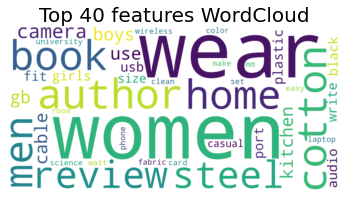

In [55]:
all_features = tfidf_vect.get_feature_names()              #Instantiate the feature from the vectorizer
top_features=''                                            # Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=', '
    
print(top_features)  

print(" ") 
print(" ") 

from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",colormap='viridis',width=2000, 
                          height=1000).generate(top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()

#### Summary:

We used dataset which has the text format and their category type (household, books, Clothing & Accessories and Electronics).
The goal was to build a model for text-classification.
We created a custom function to plot labeled barplots.
We plotted the percentage of text for each Label Category.
We plotted the distribution of all Text across all categories.

We plotted the word cloud of text under label category of books.
We plotted the word cloud of text under label category of Clothing & Accessories.
We plotted the word cloud of text under label category of Household.
We plotted the word cloud of text under label category of Electronics.

We Pre-processed the data using variuos techniques and libraries.

The pre-precessed data is converted(vectorized) to numbers, so that we can feed the data in the model.
After building the classification model, we predicted the result for the test data.
We trained the model and optimize the parameter that led to significant increase in the overall accuracy
After that we saw that using the above techniques, our model performed good in perspective of how the text classification models perform.
We can increase the max_feature parameter in the vectorizer &we can also apply other model and hyperparameter tuning to increase the overall accuracy.
One more way to increase accuracy is to use different variations of Pre-processing